# Importing Libraries

In [30]:
import numpy as np
import pandas as pd 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Fetching Data and PreProcessing

In [31]:
#Distinct dataset for training and testing
prices_dataset_train =  pd.read_csv('SP500_train.csv')
prices_dataset_test =  pd.read_csv('SP500_test.csv')

In [32]:
prices_dataset_train.head()

,date,open,high,low,close,adj_close,volume
0,03-01-2012,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
1,04-01-2012,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2,05-01-2012,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
3,06-01-2012,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
4,09-01-2012,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000


In [33]:
prices_dataset_test.head()

,date,open,high,low,close,adj_close,volume
0,2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
1,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
3,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
4,2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000


In [34]:
trainingset = prices_dataset_train.iloc[:,5:6].values
testset = prices_dataset_test.iloc[:,5:6].values

In [35]:
#Min-max normalization
min_max_scaler = MinMaxScaler(feature_range=(0,1))
scaled_trainingset = min_max_scaler.fit_transform(trainingset)

In [36]:
#Creating the training dataset
X_train = []
y_train = []
for i in range(40,1258):
    X_train.append(scaled_trainingset[i-40:i,0])  #we use the previous 40 prices in order to forecast the next one
    y_train.append(scaled_trainingset[i,0])

In [37]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# Building the LSTM Model

In [38]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1))

In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
39/39 [==============================] - 5s 32ms/step - loss: 0.0465
Epoch 2/100
39/39 [==============================] - 1s 32ms/step - loss: 0.0092
Epoch 3/100
39/39 [==============================] - 1s 31ms/step - loss: 0.0071
Epoch 4/100
39/39 [==============================] - 1s 31ms/step - loss: 0.0077
Epoch 5/100
39/39 [==============================] - 1s 31ms/step - loss: 0.0072
Epoch 6/100
39/39 [==============================] - 1s 33ms/step - loss: 0.0062
Epoch 7/100
39/39 [==============================] - 1s 33ms/step - loss: 0.0065
Epoch 8/100
39/39 [==============================] - 1s 31ms/step - loss: 0.0059
Epoch 9/100
39/39 [==============================] - 1s 31ms/step - loss: 0.0060
Epoch 10/100
39/39 [==============================] - 1s 32ms/step - loss: 0.0062
Epoch 11/100
39/39 [==============================] - 1s 31ms/step - loss: 0.0062
Epoch 12/100
39/39 [==============================] - 1s 31ms/step - loss: 0.0057
Epoch 13/100
39/39 [=====

In [40]:
#training set plus testset
dataset_total = pd.concat((prices_dataset_train['adj_close'],prices_dataset_test['adj_close']), axis=0) 

In [41]:
#all inputs for test set
inputs = dataset_total[len(dataset_total)-len(prices_dataset_test)-40:].values
inputs = inputs.reshape(-1,1)

In [42]:
inputs = min_max_scaler.transform(inputs) 
X_test = []
for i in range(40,len(prices_dataset_test)+40):
    X_test.append(inputs[i-40:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# Model Predictions

In [43]:
predictions = model.predict(X_test)
predictions = min_max_scaler.inverse_transform(predictions)

1/1 [==============================] - 1s 1s/step


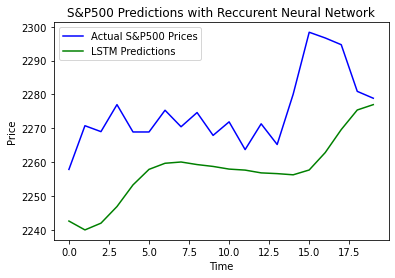

In [44]:
plt.plot(testset, color='blue', label='Actual S&P500 Prices')
plt.plot(predictions, color='green', label='LSTM Predictions')
plt.title('S&P500 Predictions with Reccurent Neural Network')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()